# Lesson - Statistics and Probability XIX: Significance Testing

In this lesson, we'll discuss the chi-squared test for categorical data. This test enables us to determine the statistical significance of observing a set of categorical values.
We'll be working with data on US income and demographics.  

Dataset
We'll be working with data on US income and demographics `income.csv`. Here are the first few rows of the data, in csv format:

```
age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K

```

Each row represents a single person who was counted in the 1990 US Census, and contains information about their income and demographics. Here are some of the relevant columns:

- age -- how old the person is
- workclass -- the type of sector the person is employed in.
- race -- the race of the person.
- sex -- the gender of the person, either Male or Female.

The entire dataset has 32561 rows, and is a sample of the full Census. Of the rows, 10771 are Female, and 21790 are Male. These numbers look a bit off, because the full Census shows that the US is about 50% Male and 50% Female. So our expected values for number of Males and Females would be 16280.5 each.

We know that something looks off, but we don't quite know how to quantify how different the observed and expected values are. We also don't have any way to determine if there's a statistically significant difference between the two groups, and if we need to investigate further.

This is where a chi-squared test can help. The chi-squared test enables us to quantify the difference between sets of observed and expected categorical values.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

### Calculating Differences between Expected and Observed Values

One way that we can determine the differences between observed and expected values is to compute simple proportional differences.

Let's say an expected value is `1000`, and the observed value is `1100`. We can compute the proportional difference with:

$$\frac{(observed - expected)}{expected} = \frac{(1100 - 1000)}{1000} = .1$$

So there's a `.1`, or `10%`, difference between our observed and expected values.

**Exercise**

Above, our observed values were 10771 Females, and 21790 Males. Our expected values were 16280.5 Females and 16280.5 Males.

- Compute the proportional difference in number of observed Females vs number of expected Females. Assign the result to `female_diff`.
- Compute the proportional difference in number of observed Males vs number of expected Males. Assign the result to `male_diff`.

In [2]:
expected_female = 16280.5
observed_female = 10771
expected_male = 16280.5
observed_male = 21790

female_diff = (observed_female - expected_female) / expected_female
male_diff = (observed_male - expected_male) / expected_male

print(female_diff, male_diff)

-0.33841098246368356 0.33841098246368356


### Squaring the Differences

Above, we got -0.338 for the Female difference, and 0.338 for the Male difference. These are great for finding individual differences for each category, but since both values add up to 0, they don't give us a meaningful measure of how our overall observed counts deviate from the expected counts.

No matter what numbers you plug in for observed Male or Female counts, the differences between observed and expected will always add to 0, because the total observed count for Male and Female items always comes out to 32561. If the observed count of Females is high, the count of Males has to be low to compensate, and vice versa.

What we really want to find is one number that can tell us how much all of our observed counts deviate from all of their expected counterparts. This will let us figure out if our difference in counts is statistically significant. We can get one step closer to this by squaring the top term in our difference formula:

$$\frac{(observed - expected)^{2}}{expected} = \frac{(1100 - 1000)^{2}}{1000} = 10$$

quaring the difference will ensure that all the differences don't sum to zero (we can't have negative squares), giving us a non-zero number we can use to assess statistical significance.

We can calculate χ2, the chi-squared value, by adding up all of the squared differences between observed and expected values.

**Exercise**

Above we saw, our observed values were 10771 Females, and 21790 Males. Our expected values were 16280.5 Females and 16280.5 Males.

- Compute the difference in number of observed Females vs number of expected Females using the updated technique. Assign the result to `female_diff`.
- Compute the difference in number of observed Males vs number of expected Males using the updated technique. Assign the result to `male_diff`.
Add `male_diff` and `female_diff` together and assign to the variable `gender_chisq`.

In [3]:
expected_female = 16280.5
observed_female = 10771
expected_male = 16280.5
observed_male = 21790

female_diff = (observed_female - expected_female)**2 / expected_female
male_diff = (observed_male - expected_male)**2 / expected_male
gender_chisq = female_diff + male_diff
print(gender_chisq)

3728.950615767329


### Generating a Distribution
Now, we need a way to figure out what the chi-squared value represents. We can translate a chi-squared value into a **statistical significance** value using a chi-squared sampling distribution. A `p-value` allows us to determine whether the difference between two values is due to chance, or due to an underlying difference.

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution. Here's a rough algorithm:

- Randomly generate 32561 numbers that range from 0-1.
- Based on the expected probabilities, assign Male or Female to each number.
- Compute the observed frequences of Male and Female.
- Compute the chi-squared value and save it.
- Repeat several times.
- Create a histogram of all the chi-squared values.

By comparing our chi-squared value to the distribution, and seeing what percentage of the distribution is greater than our value, we'll get a p-value. For instance, if `5%` of the values in the distribution are greater than our chi-squared value, the p-value is `.05`

**Exercise**

Inside a for loop that repeats 1000 times:

- Use the `numpy.random.random` function to generate 32561 numbers between 0.0 and 1.0.
- Pass (32561,) into the `numpy.random.random` function to get a vector with 32561 elements.

- For each of the numbers, if it is less than .5, replace it with 0, otherwise replace it with 1.
- Count up how many times 0 occurs (Male frequency), and how many times 1 occurs (Female frequency).
- Use the expected frequencies from earlier to compute the chi-squared value.
- Compute male_diff by subtracting the expected Male count from the observed Male count, squaring it, and dividing by the expected Male count.
- Compute female_diff by subtracting the expected Female count from the observed Female count, squaring it, and dividing by the expected Female count.
- Add up male_diff and female_diff to get the chi-squared value.
- Append the chi-squared value to `chi_squared_values`.
- Create a histogram with `chi_squared_values` using the `plt.hist` method.

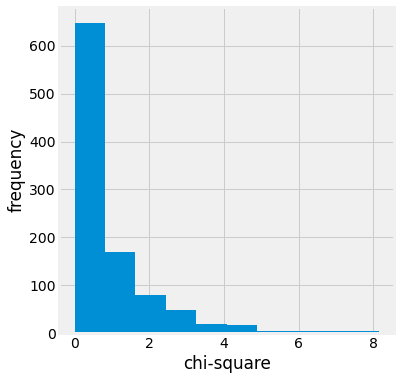

In [4]:
expected_female = 16280.5
observed_female = 10771
expected_male = 16280.5
observed_male = 21790


chi_squared_values = []

for i in range(1000):
    array = np.random.random((32561,))
    array[array<0.5] = 0
    array[array>=0.5]= 1
    male = len(array[array == 0])
    female = len(array[array==1])
    male_diff = (male - expected_male)**2 / expected_male
    female_diff = (female - expected_female)**2 / expected_female
    chisq = male_diff + female_diff
    chi_squared_values.append(chisq)
    
fig = plt.figure(figsize=(6, 6))
plt.style.use('fivethirtyeight')
plt.hist(chi_squared_values)
plt.xlabel('chi-square')
plt.ylabel('frequency')
plt.show()        

In [5]:
### Sampling Distribution and p_value

expected_female = 16280.5
observed_female = 10771
expected_male = 16280.5
observed_male = 21790

female_diff = (observed_female - expected_female)**2 / expected_female
male_diff = (observed_male - expected_male)**2 / expected_male
gender_chisq = female_diff + male_diff
print(gender_chisq)


chi_square_distribution = {}

# populate chi_square_distribution dictionary
for test_statistic in chi_squared_values:
    if chi_square_distribution.get(test_statistic, False):
        chi_square_distribution[test_statistic] += 1
    else:
        chi_square_distribution[test_statistic] = 1
# determine p_value
frequencies = []
for key in chi_square_distribution.keys():
    if key >= gender_chisq:
        frequencies.append(sampling_distribution[key])
    
p_value = np.sum(frequencies)/1000
print(p_value)
print(np.max(chi_squared_values))

3728.950615767329
0.0
8.14548078990203


### Statistical Significance

Above the p_value is zero as no random sample yielded a chi-squared value above the observed chi-squared value which means that this cannot be attributed to chance. Since `.05` is the typical threshold for statistical significance, and anything below it is considered significant, so our result is statistically significant. A significant value indicates that something is different between the observed and expected values, but it doesn't indicate what is different. 

The highest value in the chi-squared sampling distribution was about 10.22. This means that our chi-squared value is higher than 100% of all the values in the sampling distribution, so we get a p-value of 0. This means that there is a 0% chance that we could get such a result randomly.

This would indicate that we need to investigate our data collection techniques more closely to figure out why such a result occurred.

Because a chi-squared value has no sign (all chi-squared values are positive), it doesn't tell us anything about the direction of the statistical significance. If we had 10771 Females, and 21790 Males, or 10771 Males, and 21790 Females, we'd get the same chi-squared value. It's important to look at the data and see how the data is unbalanced after calculating a chi-squared value and getting a significant result.

### Sample Size and Chi Square

One interesting thing about chi-squared values is that they get smaller as the sample size decreases. For example, with our Male and Female example, below we only have 100 rows, but the same observed and expected proportions. `32561` (our original number of rows) divided by `100` (our new number of rows) is `325.61`. If we multiply `11.4522` by `325.61`, we get `3728.95`, which is the exact same chi-squared value that we got for original sample (as calculated below). So as sample size changes, the chi-squared value changes proportionally.

In [6]:
# Original chi square
expected_female = 16280.5
observed_female = 10771
expected_male = 16280.5
observed_male = 21790

female_diff = (observed_female - expected_female)**2 / expected_female
male_diff = (observed_male - expected_male)**2 / expected_male
gender_chisq = female_diff + male_diff
print(gender_chisq)

# Calculate for a sample size of 100
expected_female = 50
observed_female = 33.09
expected_male = 50
observed_male = 66.92

female_diff = (observed_female - expected_female)**2 / expected_female
male_diff = (observed_male - expected_male)**2 / expected_male
gender_chisq_small = female_diff + male_diff
print(gender_chisq_small)
ratio_chisq = gender_chisq / gender_chisq_small
print(ratio_chisq)
ratio_sample = 32561 / 100
print(ratio_sample)

3728.950615767329
11.444689999999998
325.82364535582263
325.61


**Exercise**

Let's say our observed values are 107.71 Females, and 217.90 Males. Our expected values are 162.805 Females and 162.805 Males (A sample size which is 100 times smaller than original sample).

- Compute the difference in number of observed Females vs number of expected Females. Assign the result to `female_diff`.
- Compute the difference in number of observed Males vs number of expected Males. Assign the result to `male_diff`.
- Add male_diff and female_diff together and assign to the variable gender_chisq.

In [7]:
expected_female = 162.805
observed_female = 107.71
expected_male = 162.805
observed_male = 217.90

female_diff = (observed_female - expected_female)**2 / expected_female
male_diff = (observed_male - expected_male)**2 / expected_male
gender_chisq_100 = female_diff + male_diff
print(gender_chisq_100)

37.2895061576733


### Sampling Distribution Equality

As sample sizes get larger, seeing large deviations from the expected probabilities gets less and less likely. For example, if we're flipping a coin 10 times, we wouldn't be surprised to see a result like 8H2T. This is a fairly skewed result, but in a small sample size, random chance can create effects like this. It would be very surprising to see 800H200T after flipping a coin 1000 times, though. A result like this would probably make us check the coin to see if it's a trick coin or weighted improperly.
**The chi-squared value follows the same principle. Chi-squared values increase as sample size increases, but the chance of getting a high chi-squared value decreases as the sample gets larger**.

These two effects offset each other, and a chi-squared sampling distribution constructed when sampling 200 items for each iteration will look identical to one sampling 1000 items.

This enables us to easily compare any chi-squared value to a master sampling distribution to determine statistical significance, no matter what sample size the chi-squared value was created with.

**Exercise**

Inside a for loop that repeats 1000 times:

- Use the numpy.random.random function to generate 300 numbers between 0.0 and 1.0.
- Pass (300,) into the `numpy.random.random` function to get a vector with 300 elements.
- For each of the numbers, if it is less than .5, replace it with 0, otherwise replace it with 1.
- Count up how many times 0 occurs (Male frequency), and how many times 1 occurs (Female frequency).
- Use the expected frequencies from earlier to compute the chi-squared value.
- Compute male_diff by subtracting the expected Male count (150) from the observed Male count, squaring it, and dividing by the expected Male count.
- Compute female_diff by subtracting the expected Female count (150) from the observed Female count, squaring it, and dividing by the expected Female count.
- Add up male_diff and female_diff to get the chi-squared vlaue.
- Append the chi-squared value to `chi_squared_values`.
- Create a histogram with chi_squared_values using the plt.hist method.
- This plot should look identical to the one generated earlier.

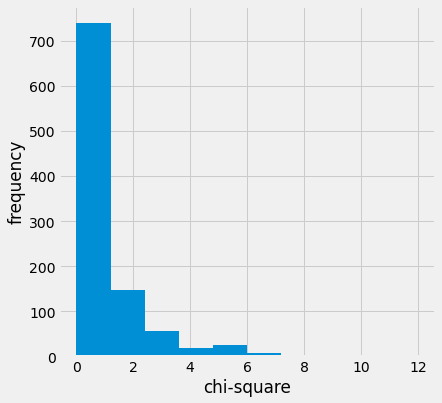

In [8]:
expected_female = 150
expected_male = 150



chi_squared_values = []

for i in range(1000):
    array = np.random.random((300,))
    array[array<0.5] = 0
    array[array>=0.5]= 1
    male = len(array[array == 0])
    female = len(array[array==1])
    male_diff = (male - expected_male)**2 / expected_male
    female_diff = (female - expected_female)**2 / expected_female
    chisq = male_diff + female_diff
    chi_squared_values.append(chisq)
    
fig = plt.figure(figsize=(6, 6))
plt.style.use('fivethirtyeight')
plt.hist(chi_squared_values)
plt.xlabel('chi-square')
plt.ylabel('frequency')
plt.show()        

### Degrees of Freedom

When we were computing the chi-squared value earlier, we were working with 2 values that could vary, the number of Males and the number of Females. But actually, only 1 of the values could vary. Since we already know the total number of values, 32561, if we set one of the values, the other has to be the difference between 32561 and the value we set.

If we set a count for Male or Female, we know what the other value has to be, because they both need to add up to 32561.

A **degree of freedom** is the number of values that can vary without the other values being "locked in". In the case of our two categories, there is actually only one degree of freedom.

### Increasing Number of Degrees of Freedom
So far, we've only calculated chi-squared values for 2 categories and 1 degree of freedom. We can actually work with any number of categories, and any number of degrees of freedom. We can accomplish this using largely the same formula we've been using, but we will need to generate new sampling distributions for each number of degrees of freedom.

If we look at the `race` column of the income data, the possible values are `White`, `Black`, `Asian-Pac-Islander`, `Amer-Indian-Eskimo`, and `Other`.
We can also get expected results from US census 1990:
`White` -- 80.3%
`Black` -- 12.1%
`Asian-Pac-Islander` -- 2.9%
`Amer-Indian-Eskimo` -- .8%
`Other` -- 3.9%

**Exercise**

Below, we will calculate chi squared values for the `race` variable:
For each category (White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, and Other):
- compute the difference between the expected and observed counts,
- square the difference,
- divide by the expected value,
- append each result to a list,
- sum the values in the list and assign the result to `race_chisq`

In [9]:
income = pd.read_csv('income.csv')
race_observed = income['race'].value_counts().to_dict()
race_expected_percent = {' White': 80.3, ' Black': 12.1, ' Asian-Pac-Islander': 2.9, ' Amer-Indian-Eskimo': 0.8, ' Other': 3.9}
sum_race_observed = sum(race_observed.values())
race_expected = {}
for key in race_expected_percent:
    race_expected[key]  = round(race_expected_percent[key] * sum_race_observed/100, 1)
    
print(race_observed)
print(race_expected)

{' White': 27816, ' Black': 3124, ' Asian-Pac-Islander': 1039, ' Amer-Indian-Eskimo': 311, ' Other': 271}
{' White': 26146.5, ' Black': 3939.9, ' Asian-Pac-Islander': 944.3, ' Amer-Indian-Eskimo': 260.5, ' Other': 1269.9}


In [10]:
diffs = []

for key in race_observed:
    observed = race_observed[key]
    expected = race_expected[key]
    chisq = (observed - expected)**2/expected
    diffs.append(chisq)
race_chisq = sum(diffs)
print(race_chisq)    

1080.581382166482


### Using Scipy for finding p_value
Rather than constructing another chi-squared sampling distribution for 2 degrees of freedom, we can use a function from the [SciPy](https://www.scipy.org/) library to do it more quickly.

The [scipy.stats.chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.chisquare.html) function takes in an array of observed frequences, and an array of expected frequencies, and returns a tuple containing both the chi-squared value and the matching p-value that we can use to check for statistical significance.

```
import numpy as np
from scipy.stats import chisquare

observed = np.array([5, 10, 15])
expected = np.array([7, 11, 12])
chisquare_value, pvalue = chisquare(observed, expected)
```

The scipy.stats.chisquare function returns a list, so we can assign each item in the list to a separate variable using 2 variable names separated with a comma, as above.

Below, we will calculate the chisquare and p_values for race_observed and race_expected distributions above.

In [11]:
race_expected_array = []
race_observed_array = []

for key in race_expected:
    race_expected_array.append(race_expected[key])
    race_observed_array.append(race_observed[key])
    
race_expected_array = np.array(race_expected_array)
race_observed_array = np.array(race_observed_array)
print(race_expected_array)
print(race_observed_array)

[26146.5  3939.9   944.3   260.5  1269.9]
[27816  3124  1039   311   271]


In [12]:
from scipy.stats import chisquare
chisquare_value, race_pvalue = chisquare(f_obs = race_observed_array, f_exp = race_expected_array)
print(chisquare_value, race_pvalue)

1080.581382166482 1.2250809797118174e-232


## Multi Category Chi-squared Tests

Above, we calculated a chi-squared value indicating how the observed frequencies in a single categorical column, such as `sex` or `race`, varied from the US population as a whole.

Now, we'll look how to make this same technique applicable to cross tables, that show how two categorical columns interact. For instance, the relationship between sex and high_income in the table below is not quite sufficient to show the pattern. But it's hard to immediately quantify that pattern, and tell if it's significant. We can apply the chi-squared test (also known as the [chi-squared test of association](https://en.wikipedia.org/wiki/Chi-squared_test)) to figure out if there's a statistically significant correlation between two categorical columns.



In [13]:

print(income[['high_income', 'sex']].tail())

      high_income      sex
32556       <=50K   Female
32557        >50K     Male
32558       <=50K   Female
32559       <=50K     Male
32560        >50K   Female


In [14]:
income_is = income[['sex', 'high_income']]
income_sex = pd.DataFrame({'Income': ['>50k', '<=50k', 'Totals'], 'Male': [0,0,0], 'Female': [0,0,0], 'Totals': [0,0,0]})
income_sex

,Income,Male,Female,Totals
0,>50k,0,0,0
1,<=50k,0,0,0
2,Totals,0,0,0


In [15]:
# Generate a table based on income and sex
income_sex.iloc[0,1] = income_is[(income_is['sex'] == ' Male') & (income_is['high_income'] == ' >50K')]['sex'].size
income_sex.iloc[0,2] = income_is[(income_is['sex'] == ' Female') & (income_is['high_income'] == ' >50K')]['sex'].size
income_sex.iloc[1,1] = income_is[(income_is['sex'] == ' Male') & (income_is['high_income'] == ' <=50K')]['sex'].size
income_sex.iloc[1,2] = income_is[(income_is['sex'] == ' Female') & (income_is['high_income'] == ' <=50K')]['sex'].size
income_sex.iloc[2,1] = income_sex.Male.sum()
income_sex.iloc[2,2] = income_sex.Female.sum()
income_sex['Totals'] = income_sex[['Male', 'Female']].sum(axis=1)
income_sex

,Income,Male,Female,Totals
0,>50k,6662,1179,7841
1,<=50k,15128,9592,24720
2,Totals,21790,10771,32561


In [16]:
# Generate a table based on proportional income and sex
income_sex_prop = income_sex.copy()
for col in income_sex_prop.columns[1:]:
    income_sex_prop[col] = round(income_sex_prop[col]/income.shape[0], 3)
print(income_sex_prop)
income_sex

   Income   Male  Female  Totals
0    >50k  0.205   0.036   0.241
1   <=50k  0.465   0.295   0.759
2  Totals  0.669   0.331   1.000


,Income,Male,Female,Totals
0,>50k,6662,1179,7841
1,<=50k,15128,9592,24720
2,Totals,21790,10771,32561


### Calculating Expected Values
In the above dataset `income_sex_prop`:
Each cell represents the proportion of people in the data set that fall into the specified categories.

- 20.5% of people in the whole data set are males earning >50k in income.
- 33% of the whole dataset is Female
- 75.9% of the whole dataset earns <=50k    

We can use our total proportions to calculate expected values. 24.1% of all people in `income` earn >50k, and 33% of all people in `income` are Female, so we'd expect the proportion of people who are female and earn >50k to be `0.241 * 0.33`, which is `0.07953`. We have this expectation based on the proportions of Females and >50k earners across the whole dataset. Instead, we see that the observed proportion is `0.036`, which indicates that there may be some correlation between the sex and high_income columns.

We can convert our expected proportion to an expected value by multiplying by 32561, the total number of rows in the data set, which gives us `32561 * 0.07953, or 2589.6`.

- Below, we will calculate expected values for males and females with over and under 50K income.

In [17]:
males_over50k = round(0.669 * 0.241 * income.shape[0],1)
males_under50k = round(0.669 * 0.759 * income.shape[0],1)
females_over50k = round(0.331 * 0.241 * income.shape[0],1)
females_under50k = round(0.331 * 0.759 * income.shape[0],1)

income_sex_prop['male_exp'] = [males_over50k, males_under50k, males_over50k+males_under50k]
income_sex_prop['female_exp'] = [females_over50k, females_under50k, females_over50k+females_under50k]
income_sex_prop

,Income,Male,Female,Totals,male_exp,female_exp
0,>50k,0.205,0.036,0.241,5249.8,2597.4
1,<=50k,0.465,0.295,0.759,16533.5,8180.3
2,Totals,0.669,0.331,1.000,21783.3,10777.7


### Calculating chi-squared value

Now that we have our expected values, we can calculate the chi-squared value. 

- Subtract the expected value from the observed value.
- Square the difference.
- Divide the squared difference by the expected value.
- Repeat for all the observed and expected values and add up the values.

$$\begin{equation}
\sum \frac{(\hbox{observed}-\hbox{expected})^{2}}{\hbox{ expected }}
\end{equation}$$

In [18]:
# Add observed values columns to the dataset income_sex_prop

income_sex_prop['male_obs'] =  income_sex['Male']
income_sex_prop['female_obs'] =  income_sex['Female']
print(income_sex_prop)

   Income   Male  Female  Totals  male_exp  female_exp  male_obs  female_obs
0    >50k  0.205   0.036   0.241    5249.8      2597.4      6662        1179
1   <=50k  0.465   0.295   0.759   16533.5      8180.3     15128        9592
2  Totals  0.669   0.331   1.000   21783.3     10777.7     21790       10771


In [20]:

observed = [6662, 1179, 15128, 9592] # combine all observed and expected values as a series
expected = [5257.6, 2589.6, 16558.2, 8155.6]
values = []

for i, obs in enumerate(observed):
    exp = expected[i]
    value = (obs - exp) ** 2 / exp
    values.append(value)

chisq_gender_income = sum(values)
chisq_gender_income



1520.0362248035606

### Finding Statistical Significance

We can now use the chi-squared sampling distribution technique to find a p-value associated with the chi-squared value. The p-value will tell us whether the difference between the observed and expected values is statistically significant or not.
Rather than construct a sampling distribution manually, we'll use the `scipy.stats.chisquare` function.

In [23]:
observed = np.array(observed)
expected = np.array(expected)
from scipy.stats import chisquare

chisquare_value, p_value = chisquare(f_obs = observed, f_exp = expected)
print(chisquare_value, p_value)

1520.0362248035606 0.0


### Cross Tables

We can also scale up the chi-squared test to cases where each category contains more than two possibilities. We'll illustrate this with an example where we look at sex vs race.

Before we can find the chi-squared value, we need to find the observed frequency counts. We can do this using the `pandas.crosstab` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html). The crosstab function will print a table that shows frequency counts for two or more columns.

Using the function, will print a table showing how many people from income fall into each category of sex and high_income. The second parameter passed into pandas.crosstab is actually a list -- this parameter can contain more than one item.

Below, we have used the the `pandas.crosstab` function to print out tables comparing the `sex` column of income to the `race` column of `income`, as well as `sex` column of income and `high_income` column of `income`.

In [25]:
table_sex_income = pd.crosstab(income["sex"], [income["high_income"]])
print(table_sex_income)

high_income   <=50K   >50K
sex                       
 Female        9592   1179
 Male         15128   6662


In [26]:
table_sex_race = pd.crosstab(income["sex"], [income["race"]])
print(table_sex_race)

race      Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
sex                                                                      
 Female                  119                  346    1555     109    8642
 Male                    192                  693    1569     162   19174


### Finding Expected Values

Once we have the observed frequency counts, we can generate the expected values. We can use the s`cipy.stats.chi2_contingency` [function](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html) to do this. The function takes in a cross table of observed counts, and returns the chi-squared value, the p-value, the degrees of freedom, and the expected frequencies.


In [30]:
from scipy.stats import chi2_contingency
observed = np.array([[5, 5], [10, 10]])

chisq_value, pvalue, df, expected = chi2_contingency(observed)
print(chisq_value, pvalue, df, expected)

0.0 1.0 1 [[ 5.  5.]
 [10. 10.]]


We can  also directly pass the result of the pandas.crosstab function into the scipy.stats.chi2_contingency function, which makes it extremely easy to perform a chi-squared test. Below, we calculate the p-value for the `sex` and `race` columns of `income` using the function.

In [35]:
from scipy.stats import chi2_contingency
chisq_value_gender_race, pvalue_gender_race, df_gender_race, expected_gender_race = chi2_contingency(pd.crosstab(income["sex"], 
                                                                                                                 [income["race"]]))
print(chisq_value_gender_race, pvalue_gender_race, df_gender_race, expected_gender_race)

454.2671089131088 5.192061302760456e-97 4 [[  102.87709223   343.69549461  1033.40204539    89.64531188
   9201.3800559 ]
 [  208.12290777   695.30450539  2090.59795461   181.35468812
  18614.6199441 ]]


### Some Caveats

There are a few caveats to using the chi-squared test that are important to cover:

- Finding that a result isn't significant doesn't mean that no association between the columns exists. For instance, if we found that the chi-squared test between the `sex` and `race` columns returned a p-value of .1, it wouldn't mean that there is no relationship between sex and race. It just means that there isn't a statistically significant relationship.
- Finding a statistically significant result doesn't imply anything about what the correlation is. For instance, finding that a chi-squared test between `sex` and `race` results in a p-value of .01 doesn't mean that the dataset contains too many Females who are White (or too few). A statistically significant finding means that some evidence of a relationship between the variables exists, but needs to be investigated further.
- Chi-squared tests can only be applied in the case where each possibility within a category is independent. For instance, the Census counts individuals as either Male or Female, not both.
- Chi-squared tests are more valid when the numbers in each cell of the cross table are larger. So if each number is 100, great -- if each number is 1, we may need to gather more data.